In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [3]:
cartography_df = pd.read_csv('./sem-eval-joy-cartography.csv', index_col=0)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1423360081,When tears r inappropriate: 'This day is holy ...,0.072732,0.113991,0.002304,0.927268,0.113991,0.997696,1,1,0.375000,0.927268,0.113991,1.0,True,0.5
1,1423360082,Hell hath no fury like a bureaucrat scorned. ―...,0.959533,0.050815,0.996321,0.040467,0.050815,0.003679,0,0,0.000000,0.959533,0.050815,1.0,True,1.0
2,1423360083,People’s deepest passions often scare them too...,0.929105,0.082582,0.996059,0.070895,0.082582,0.003941,0,0,0.000000,0.929105,0.082582,1.0,True,1.0
3,1423360084,Being playful as shit😤,0.802771,0.168927,0.997098,0.197229,0.168927,0.002902,0,0,0.142857,0.802771,0.168927,1.0,True,1.0
4,1423360085,@EE your a joke I pay for data when I'm in Spa...,0.996079,0.001332,0.997264,0.003921,0.001333,0.002736,0,0,0.142857,0.996079,0.001332,1.0,True,1.0


In [4]:
cartography_df['agreement_factor'] = cartography_df.apply(lambda row: row.agreement_factor if row.label == 1 else 1 - row.agreement_factor, axis=1)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1423360081,When tears r inappropriate: 'This day is holy ...,0.072732,0.113991,0.002304,0.927268,0.113991,0.997696,1,1,0.375000,0.927268,0.113991,1.0,True,0.5
1,1423360082,Hell hath no fury like a bureaucrat scorned. ―...,0.959533,0.050815,0.996321,0.040467,0.050815,0.003679,0,0,1.000000,0.959533,0.050815,1.0,True,1.0
2,1423360083,People’s deepest passions often scare them too...,0.929105,0.082582,0.996059,0.070895,0.082582,0.003941,0,0,1.000000,0.929105,0.082582,1.0,True,1.0
3,1423360084,Being playful as shit😤,0.802771,0.168927,0.997098,0.197229,0.168927,0.002902,0,0,0.857143,0.802771,0.168927,1.0,True,1.0
4,1423360085,@EE your a joke I pay for data when I'm in Spa...,0.996079,0.001332,0.997264,0.003921,0.001333,0.002736,0,0,0.857143,0.996079,0.001332,1.0,True,1.0


In [5]:
len(cartography_df['text_id'].unique())

8110

In [6]:
len(cartography_df)

8110

In [7]:
len(cartography_df)

8110

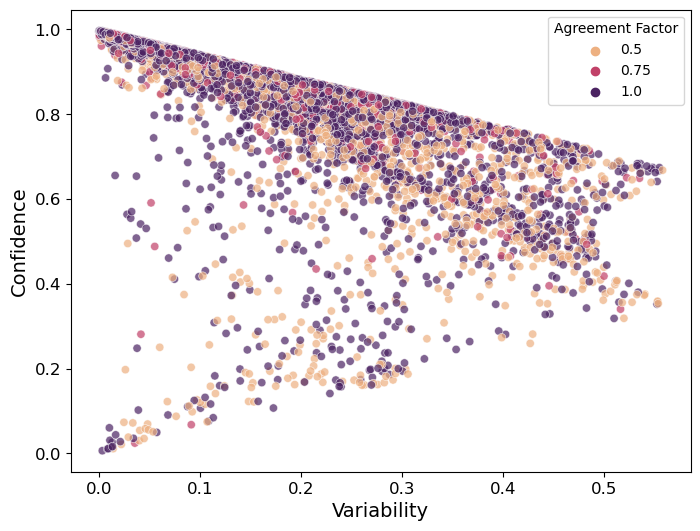

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor_rd', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5 vs. 0.75: Mann-Whitney-Wilcoxon test two-sided, P_val:8.340e-103 U_stat=4.495e+05
0.75 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.619e-04 U_stat=3.038e+06
0.5 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.496e-144 U_stat=2.634e+06


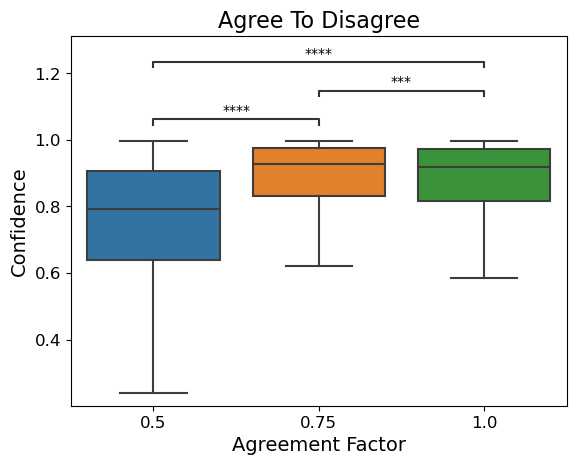

In [9]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)

pairs=[(0.5, 0.75), (0.75, 1.0), (0.5, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')


In [28]:
cartography_df['label_text'] = cartography_df['label'].map({1: 'joy', 0: 'not joy'})

In [29]:
len(cartography_df)

8110

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5_joy vs. 0.75_joy: Mann-Whitney-Wilcoxon test two-sided, P_val:8.340e-103 U_stat=4.495e+05
0.75_joy vs. 1.0_joy: Mann-Whitney-Wilcoxon test two-sided, P_val:9.184e-31 U_stat=5.107e+05
0.5_joy vs. 1.0_joy: Mann-Whitney-Wilcoxon test two-sided, P_val:1.421e-225 U_stat=3.549e+05


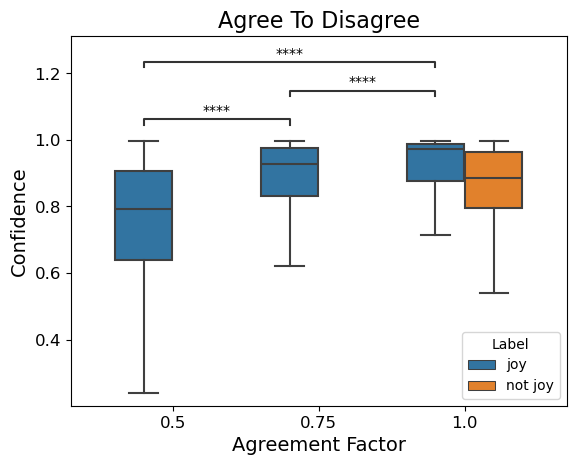

In [33]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False, hue='label_text')


pairs=[((0.5, 'joy'), (0.75, 'joy')), ((0.75, 'joy'), (1.0, 'joy')), ((0.5, 'joy'), (1.0, 'joy'))]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label_text')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Label', loc='lower right')

plt.savefig("./plots/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

In [34]:
cartography_df['label'].value_counts()

1    4055
0    4055
Name: label, dtype: int64

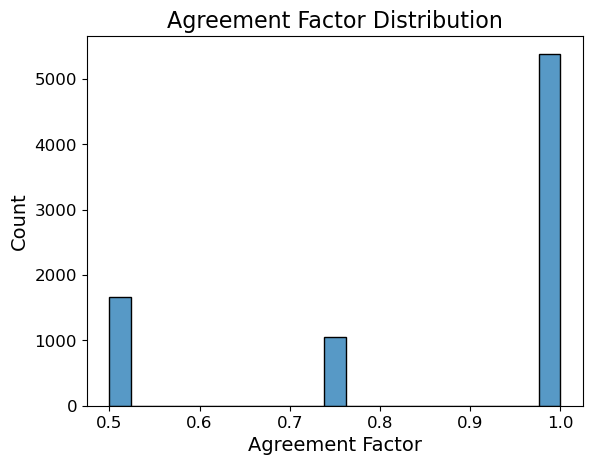

In [35]:
sns.histplot(data=cartography_df, x="agreement_factor_rd")
plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_hist.png", dpi=600, bbox_inches='tight')

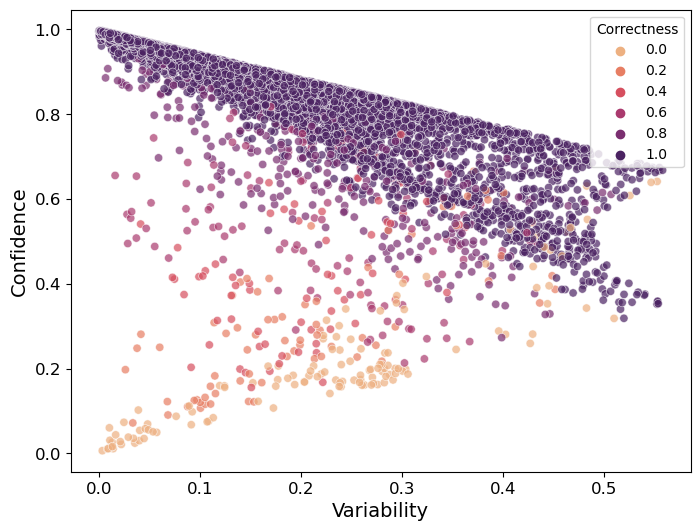

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [37]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.2508249129999298, pvalue=1.3893615222972157e-116)

In [38]:
pearsonr(cartography_df[cartography_df['label']==1]['confidence'], cartography_df[cartography_df['label']==1]['agreement_factor_rd'])

PearsonRResult(statistic=0.4703630177451063, pvalue=2.254957435248482e-222)